In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, roc_auc_score, recall_score
from sklearn.utils import resample

In [2]:
from utils import *

In [3]:
data = load_data_json_file('data.json')

In [4]:
labels = load_info_json_file('data.info')

In [5]:
df = concat_two_dataframe(labels, data)

In [6]:
df.head()

,gene_id,transcript_id,transcript_position,label,dwelling_time_before,sd_before,mean_before,dwelling_time_current,sd_current,mean_current,dwelling_time_after,sd_after,mean_after,nucleotide_before,nucleotide_current,nucleotide_after
0,ENSG00000004059,ENST00000000233,244,0,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270,AAGAC,AGACC,GACCA
1,ENSG00000004059,ENST00000000233,261,0,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698,CAAAC,AAACT,AACTG
2,ENSG00000004059,ENST00000000233,316,0,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324,GAAAC,AAACA,AACAG
3,ENSG00000004059,ENST00000000233,332,0,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,2.236520,89.154000,AGAAC,GAACA,AACAT
4,ENSG00000004059,ENST00000000233,368,0,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788,AGGAC,GGACA,GACAA


In [7]:
df.shape

(121838, 16)

In [8]:
df = one_hot_encode_nucleotide_dataframe(df)

In [9]:
df

,gene_id,transcript_id,transcript_position,label,dwelling_time_before,sd_before,mean_before,dwelling_time_current,sd_current,mean_current,...,nucleotide_after_GACAG,nucleotide_after_GACAT,nucleotide_after_GACCA,nucleotide_after_GACCC,nucleotide_after_GACCG,nucleotide_after_GACCT,nucleotide_after_GACTA,nucleotide_after_GACTC,nucleotide_after_GACTG,nucleotide_after_GACTT
0,ENSG00000004059,ENST00000000233,244,0,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,...,0,0,1,0,0,0,0,0,0,0
1,ENSG00000004059,ENST00000000233,261,0,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000004059,ENST00000000233,316,0,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000004059,ENST00000000233,332,0,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000004059,ENST00000000233,368,0,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENSG00000167747,ENST00000641834,1348,1,0.009594,3.294164,118.232877,0.007300,4.929726,116.342466,...,0,1,0,0,0,0,0,0,0,0
121834,ENSG00000167747,ENST00000641834,1429,0,0.008393,4.511014,110.969565,0.010305,9.105797,114.927536,...,0,0,0,0,0,0,0,0,0,0
121835,ENSG00000167747,ENST00000641834,1531,1,0.008161,3.918438,113.968750,0.006877,4.759687,113.562500,...,0,0,0,0,0,0,0,0,0,0
121836,ENSG00000167747,ENST00000641834,1537,0,0.008044,3.191228,109.354386,0.007419,6.552982,123.263158,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# Separate majority and minority classes
df_maj = df[df['label']==0]
df_min = df[df['label']==1]
 
# Upsample minority class
n_samples = len(df_maj)
df_min = resample(df_min, replace=True, n_samples=n_samples)

# Combine
df_new = pd.concat([df_maj, df_min])

In [11]:
df_new

,gene_id,transcript_id,transcript_position,label,dwelling_time_before,sd_before,mean_before,dwelling_time_current,sd_current,mean_current,...,nucleotide_after_GACAG,nucleotide_after_GACAT,nucleotide_after_GACCA,nucleotide_after_GACCC,nucleotide_after_GACCG,nucleotide_after_GACCT,nucleotide_after_GACTA,nucleotide_after_GACTC,nucleotide_after_GACTG,nucleotide_after_GACTT
0,ENSG00000004059,ENST00000000233,244,0,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,...,0,0,1,0,0,0,0,0,0,0
1,ENSG00000004059,ENST00000000233,261,0,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000004059,ENST00000000233,316,0,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000004059,ENST00000000233,332,0,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000004059,ENST00000000233,368,0,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91324,ENSG00000142230,ENST00000414294,1271,1,0.007159,7.153158,119.894737,0.008237,2.968947,100.535789,...,0,0,0,0,0,0,0,0,0,0
15672,ENSG00000136463,ENST00000258975,1235,1,0.012669,6.281190,118.738095,0.010869,5.596738,119.833333,...,0,0,0,0,0,0,0,0,0,1
35207,ENSG00000167461,ENST00000300935,1431,1,0.009652,3.316103,114.230769,0.008062,5.897949,114.102564,...,0,0,0,0,0,0,0,0,0,0
25388,ENSG00000142657,ENST00000270776,1688,1,0.007505,3.784943,118.363636,0.007843,6.474091,120.454545,...,0,0,0,0,0,0,0,0,1,0


In [12]:
splitter = GroupShuffleSplit(test_size=0.25, n_splits=1, random_state = 7)
split = splitter.split(df_new, groups=df_new['gene_id'])
train_ind, test_ind = next(split)

train = df_new.iloc[train_ind]
test = df_new.iloc[test_ind]

In [13]:
#split the train data further into train and validation set
splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state = 7)
split = splitter.split(train, groups=train['gene_id'])
train_indx, val_indx = next(split)

training = train.iloc[train_indx]
val = train.iloc[val_indx]

In [15]:
train_x = training.drop(['gene_id','transcript_id', 'transcript_position', 'label'], axis = 1)
train_y = training['label']
val_x = val.drop(['gene_id', 'transcript_id', 'transcript_position', 'label'], axis = 1)
val_y = val['label']

In [16]:
%%time
#finding optimal value of k
error_rate = []

for i in range(1, 201, 10):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(val_x)
    error_rate.append(np.mean(pred_i != val_y))

CPU times: user 23min 41s, sys: 1min 25s, total: 25min 6s
Wall time: 3min 54s


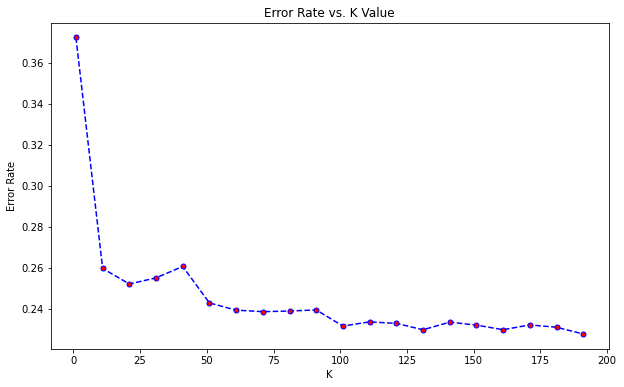

In [17]:
#plot graph of error rate against value of k
plt.figure(figsize=(10,6))
plt.plot(range(1, 201, 10), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=5)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [18]:
X_train = train.drop(['gene_id', 'transcript_id', 'transcript_position', 'label'], axis = 1)
y_train = train['label']
X_test = test.drop(['gene_id', 'transcript_id', 'transcript_position', 'label'], axis = 1)
y_test = test['label']

In [19]:
#fit KNN model where k = 60
k = 60
knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train, y_train)

#predict on test set, with results and metrics shown
pred_y = knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(pred_y, y_test))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_test, pred_y),4))
print('Precision:', round(precision_score(y_test, pred_y),4))
print('Specificity:', round(specificity,4))
print('Recall',round(recall_score(y_test,pred_y),4))
print('F1-Score:', round(f1_score(y_test,pred_y),4))
print('AUC:',round(roc_auc_score(y_test, pred_y),4))

,True Y=0,True Y=1
Predicted Y=0,23886,7244
Predicted Y=1,5513,21651


Accuracy: 0.7812
Precision: 0.797
Specificity: 0.8125
Recall 0.7493
F1-Score: 0.7724
AUC: 0.7809


In [20]:
print("Accuracy: ", round(accuracy_score(y_test, pred_y), 4))
print(classification_report(y_test, pred_y))

Accuracy:  0.7812
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     29399
           1       0.80      0.75      0.77     28895

    accuracy                           0.78     58294
   macro avg       0.78      0.78      0.78     58294
weighted avg       0.78      0.78      0.78     58294



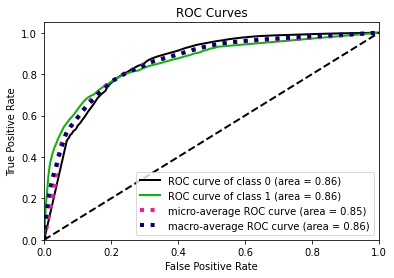

In [21]:
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [23]:
result = test[['transcript_id', 'transcript_position']]
score = [prob[1] for prob in y_probas]
result['score'] = score

<ipython-input-23-71fb7929d70b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['score'] = score


In [24]:
result.head()

,transcript_id,transcript_position,score
18,ENST00000000412,355,0.000000
19,ENST00000000412,367,0.583333
20,ENST00000000412,496,0.383333
21,ENST00000000412,501,0.783333
22,ENST00000000412,547,0.550000


In [27]:
result[result['transcript_id'] == 'ENST00000005260']

,transcript_id,transcript_position,score
379,ENST00000005260,425,0.750000
380,ENST00000005260,467,0.366667
381,ENST00000005260,542,0.900000
382,ENST00000005260,585,0.000000
383,ENST00000005260,590,0.000000
...,...,...,...
404,ENST00000005260,1756,0.666667
405,ENST00000005260,1766,1.000000
404,ENST00000005260,1756,0.666667
404,ENST00000005260,1756,0.666667
